# **Data wrangling of Test dataset**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
import math

In [20]:
test = pd.read_csv("../input/diamonds_test.csv")
test.drop(columns="Unnamed: 0",inplace=True)

### **1. Take a first look at the dataset** 

In [21]:
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


### **2. Rename the same columns that in training dataset**

In [22]:
test = test.rename(columns={"depth":"depth(%)","table":"table(%)", "x":"length","y":"width","z":"depth"})
test.head()

,carat,cut,color,clarity,depth(%),table(%),length,width,depth
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


### **3. Tranform the feature `table(%)`**

In [23]:
test["table"] = (test["table(%)"]/100)*test["width"]

In [24]:
test.drop(columns="table(%)",inplace=True)

### **4. Remove `depth(%)` feature**

In [25]:
test.drop(columns="depth(%)",inplace=True)

### **5. Change distribution of feature `carat`**

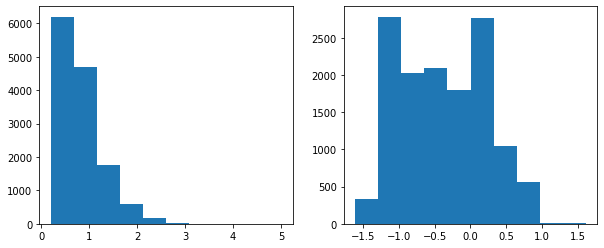

In [26]:
test["carat_log"] = test["carat"].apply(math.log)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(test["carat"],bins=10)
plt.subplot(1,2,2)
plt.hist(test["carat_log"],bins=10)
plt.show()

In [27]:
test.drop(columns="carat",inplace=True)
test.head()

,cut,color,clarity,length,width,depth,table,carat_log
0,Ideal,H,SI2,4.41,4.43,2.65,2.4808,-1.203973
1,Ideal,D,IF,4.52,4.46,2.79,2.5422,-1.078810
2,Very Good,I,VS2,7.58,7.55,4.56,4.3790,0.451076
3,Ideal,H,VS2,4.32,4.36,2.68,2.4852,-1.171183
4,Good,I,VVS1,7.26,7.21,4.63,4.3260,0.412110


### **6. Change categorical values in features `cut`, `color`, `clarity` to ordinal** 

In [28]:
cuts =  ["Fair","Good","Very Good","Premium","Ideal"]
colors = ["J","I","H","G","F","E","D"]
clarities = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]

Create new columns from the categorical ones, converting the attribute to a number

In [29]:
# Functions to convert features from categorical to numerical given a ordered categories
categorical_columns = {"cut":cuts,"color":colors,"clarity":clarities}
for key,value in categorical_columns.items():
    test[key] = pd.Categorical(test[key], categories = value, ordered = True)
    test[f"{key}_num"] = test[key].cat.codes

Finally, remove categorical columns

In [30]:
test.drop(columns=["cut","color","clarity"],inplace=True)
test.head()

,length,width,depth,table,carat_log,cut_num,color_num,clarity_num
0,4.41,4.43,2.65,2.4808,-1.203973,4,2,1
1,4.52,4.46,2.79,2.5422,-1.078810,4,6,7
2,7.58,7.55,4.56,4.3790,0.451076,2,1,3
3,4.32,4.36,2.68,2.4852,-1.171183,4,2,3
4,7.26,7.21,4.63,4.3260,0.412110,1,1,6


### **7. Save the transformed test dataset**

In [31]:
test.to_csv("../output/test.csv")